In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [4]:
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [5]:
data.tail()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [6]:
data.index

RangeIndex(start=0, stop=10, step=1)

In [7]:
data.shape

(10, 9)

In [9]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [10]:
data.isna().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [11]:
data.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [12]:
data["AttendanceRate"].mode()

0    85
Name: AttendanceRate, dtype: int64

In [14]:
data.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [19]:
special_colums = ["Male", "Female"]
data[data["Gender"].isin(special_colums )]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [20]:
special_Support  = ["High", "Medium", "Low",]
data[data["ParentalSupport"].isin(special_Support)]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


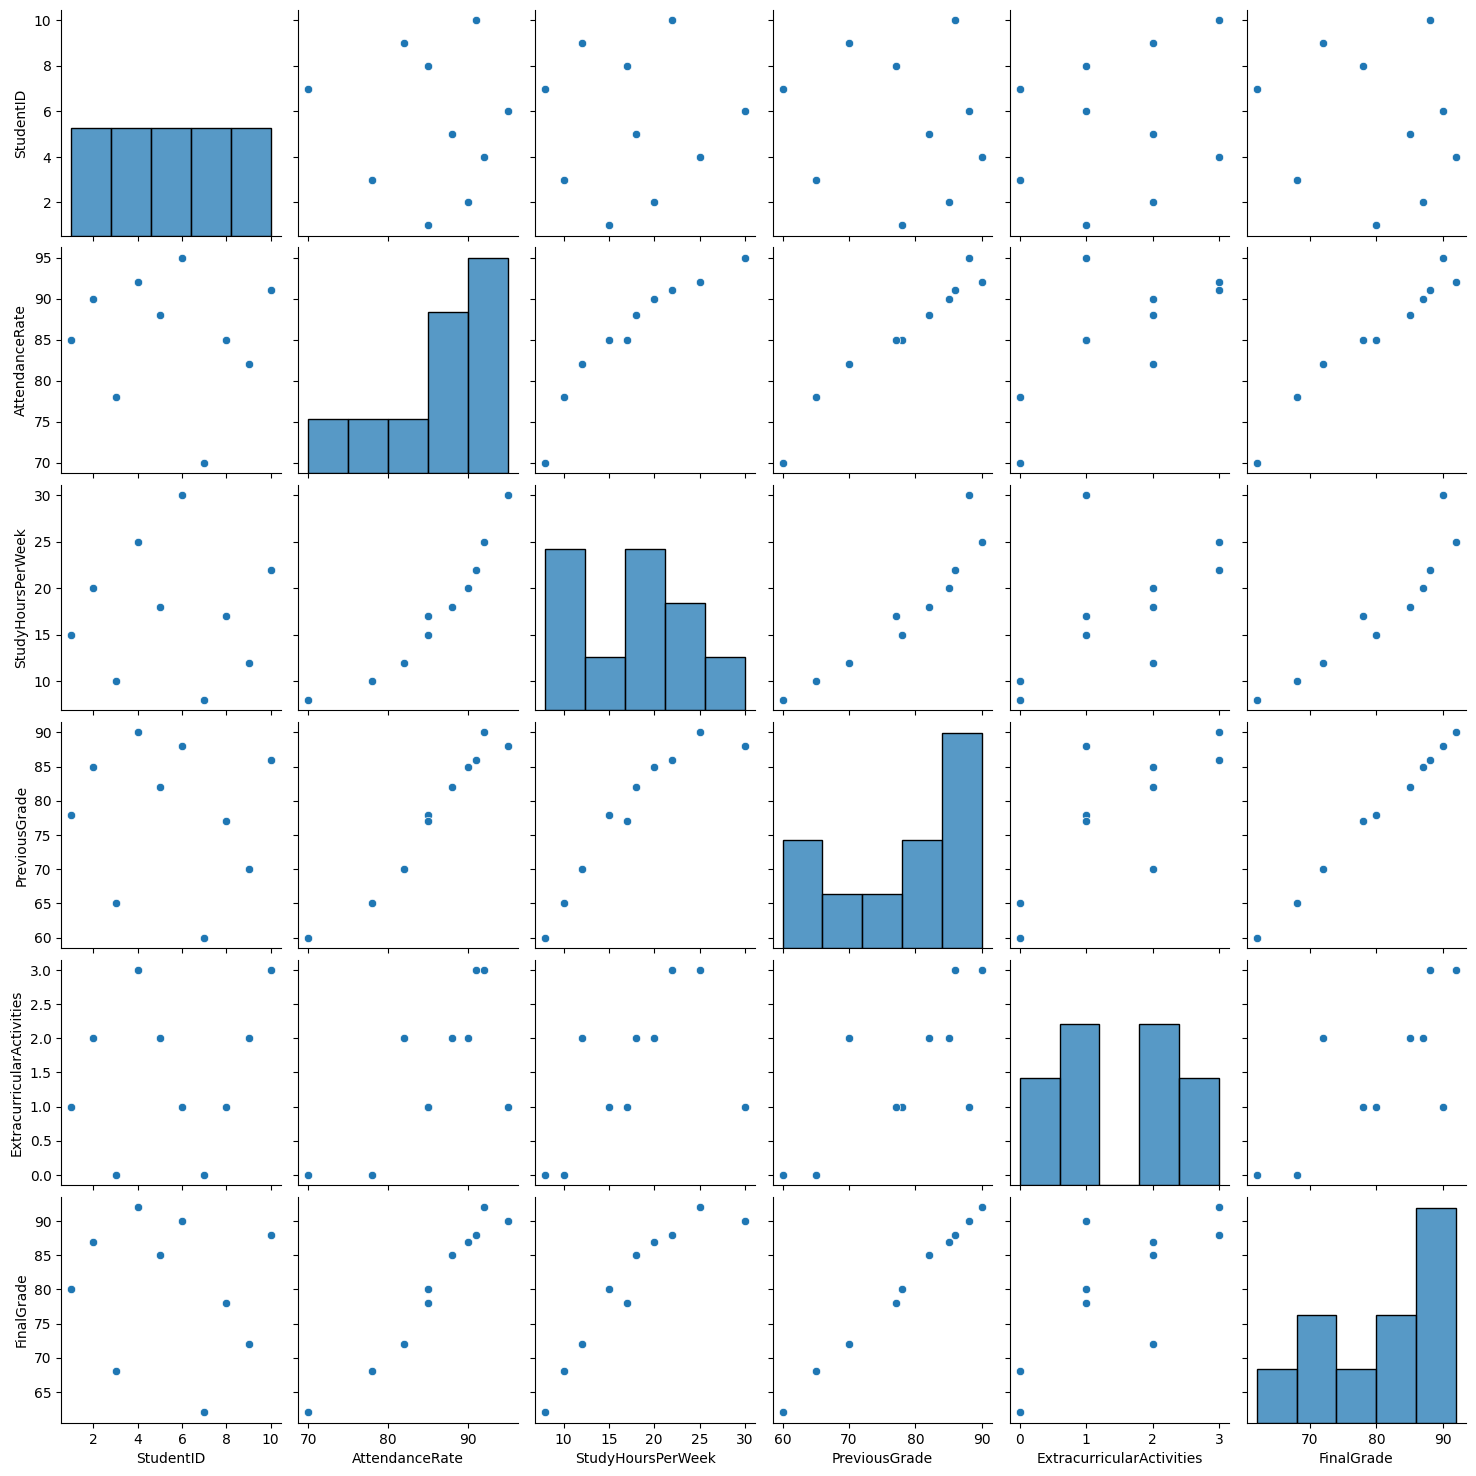

In [22]:
sns.pairplot(data)

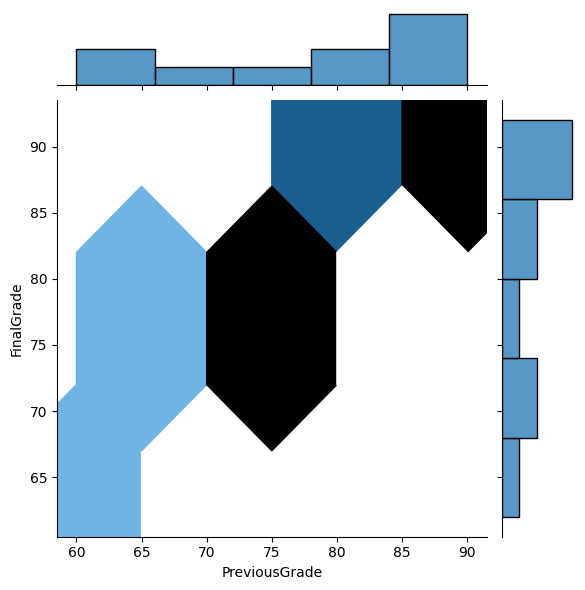

In [25]:
sns.jointplot(data = data, x = "PreviousGrade", y = "FinalGrade", kind = "hex")

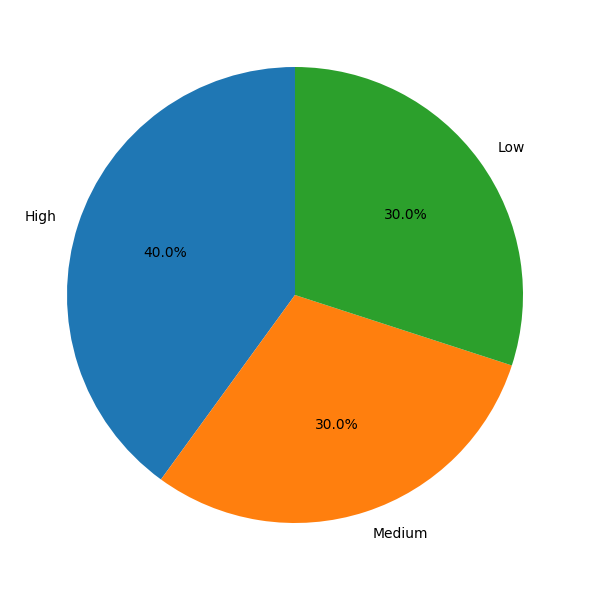

In [31]:
parental_Conditions = data["ParentalSupport"].value_counts()
plt.figure(figsize = (6, 6))
plt.pie(parental_Conditions, labels=parental_Conditions.index, autopct="%1.1f%%", startangle=90)
plt.grid()
plt.tight_layout()
plt.show()

<Axes: xlabel='AttendanceRate', ylabel='count'>

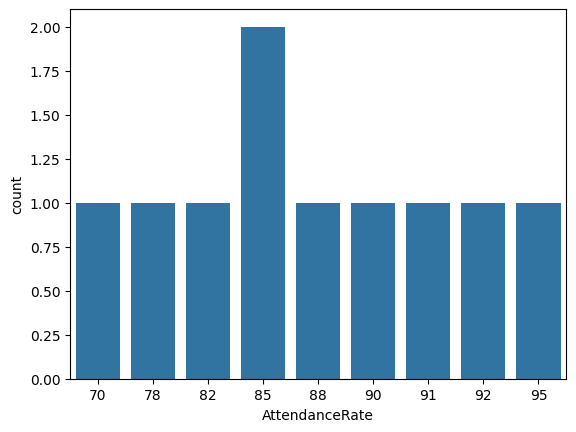

In [37]:
sns.countplot(data = data, x = "AttendanceRate")

In [38]:
data.drop(columns = ["FinalGrade"])

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
0,1,John,Male,85,15,78,1,High
1,2,Sarah,Female,90,20,85,2,Medium
2,3,Alex,Male,78,10,65,0,Low
3,4,Michael,Male,92,25,90,3,High
4,5,Emma,Female,88,18,82,2,Medium
5,6,Olivia,Female,95,30,88,1,High
6,7,Daniel,Male,70,8,60,0,Low
7,8,Sophia,Female,85,17,77,1,Medium
8,9,James,Male,82,12,70,2,Low
9,10,Isabella,Female,91,22,86,3,High


In [40]:
df_model = data.iloc[:, 1:]
df_model

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85
5,Olivia,Female,95,30,88,1,High,90
6,Daniel,Male,70,8,60,0,Low,62
7,Sophia,Female,85,17,77,1,Medium,78
8,James,Male,82,12,70,2,Low,72
9,Isabella,Female,91,22,86,3,High,88


In [41]:
df_model["Name"].value_counts()

Name
John        1
Sarah       1
Alex        1
Michael     1
Emma        1
Olivia      1
Daniel      1
Sophia      1
James       1
Isabella    1
Name: count, dtype: int64

In [42]:
df_model["Name"].unique()

array(['John', 'Sarah', 'Alex', 'Michael', 'Emma', 'Olivia', 'Daniel',
       'Sophia', 'James', 'Isabella'], dtype=object)

In [44]:
df_model["Name"] = df_model["Name"].replace(["John", "Sarah", "Alex", "Michael", "Emma","Olivia", "Daniel", "Sophia", "James", "Isabella"], [0,1,2,3,4,5,6,7,8,9,])

In [45]:
df_model

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,Male,85,15,78,1,High,80
1,1,Female,90,20,85,2,Medium,87
2,2,Male,78,10,65,0,Low,68
3,3,Male,92,25,90,3,High,92
4,4,Female,88,18,82,2,Medium,85
5,5,Female,95,30,88,1,High,90
6,6,Male,70,8,60,0,Low,62
7,7,Female,85,17,77,1,Medium,78
8,8,Male,82,12,70,2,Low,72
9,9,Female,91,22,86,3,High,88


In [46]:
df_model["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [47]:
le = pd.get_dummies(df_model[["Gender"]], prefix = "encoder", dtype = int)

In [48]:
le

,encoder_Female,encoder_Male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [49]:
df_model

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,Male,85,15,78,1,High,80
1,1,Female,90,20,85,2,Medium,87
2,2,Male,78,10,65,0,Low,68
3,3,Male,92,25,90,3,High,92
4,4,Female,88,18,82,2,Medium,85
5,5,Female,95,30,88,1,High,90
6,6,Male,70,8,60,0,Low,62
7,7,Female,85,17,77,1,Medium,78
8,8,Male,82,12,70,2,Low,72
9,9,Female,91,22,86,3,High,88


In [50]:
df_model["Gender"].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

In [53]:
df_model["Gender"]  = df_model["Gender"].replace(["Male", "Female"], [0,1])

In [54]:
df_model

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,0,85,15,78,1,High,80
1,1,1,90,20,85,2,Medium,87
2,2,0,78,10,65,0,Low,68
3,3,0,92,25,90,3,High,92
4,4,1,88,18,82,2,Medium,85
5,5,1,95,30,88,1,High,90
6,6,0,70,8,60,0,Low,62
7,7,1,85,17,77,1,Medium,78
8,8,0,82,12,70,2,Low,72
9,9,1,91,22,86,3,High,88


In [56]:
df_model["ParentalSupport"] = df_model["ParentalSupport"].replace(["High", "Medium", "Low"], [0,1,2])

In [57]:
df_model

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,0,85,15,78,1,0,80
1,1,1,90,20,85,2,1,87
2,2,0,78,10,65,0,2,68
3,3,0,92,25,90,3,0,92
4,4,1,88,18,82,2,1,85
5,5,1,95,30,88,1,0,90
6,6,0,70,8,60,0,2,62
7,7,1,85,17,77,1,1,78
8,8,0,82,12,70,2,2,72
9,9,1,91,22,86,3,0,88


In [96]:
drop_data = df_model.drop( columns = ["FinalGrade"])
drop_data

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
0,0,0,85,15,78,1,0
1,1,1,90,20,85,2,1
2,2,0,78,10,65,0,2
3,3,0,92,25,90,3,0
4,4,1,88,18,82,2,1
5,5,1,95,30,88,1,0
6,6,0,70,8,60,0,2
7,7,1,85,17,77,1,1
8,8,0,82,12,70,2,2
9,9,1,91,22,86,3,0


In [97]:
drop_data.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport
0,0,0,85,15,78,1,0
1,1,1,90,20,85,2,1
2,2,0,78,10,65,0,2
3,3,0,92,25,90,3,0
4,4,1,88,18,82,2,1


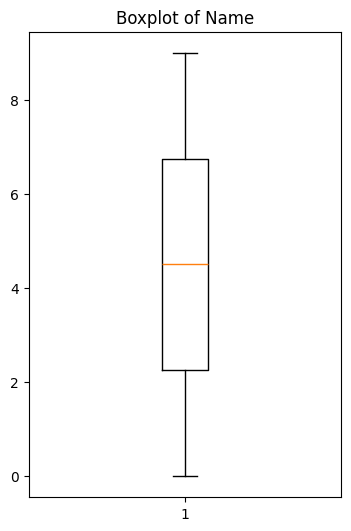

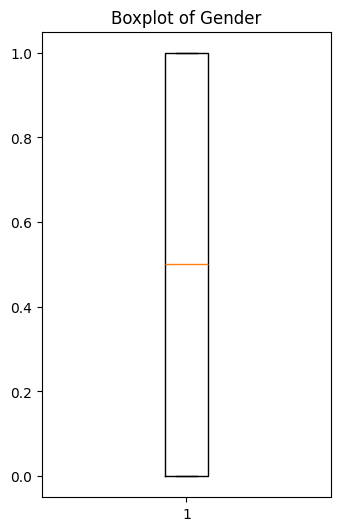

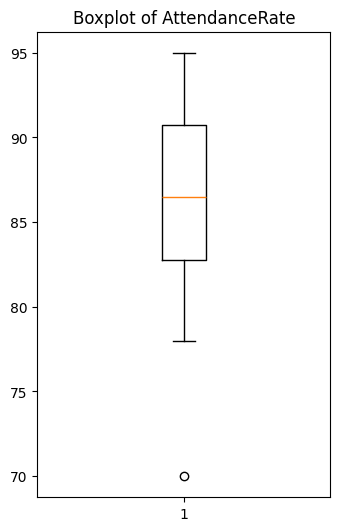

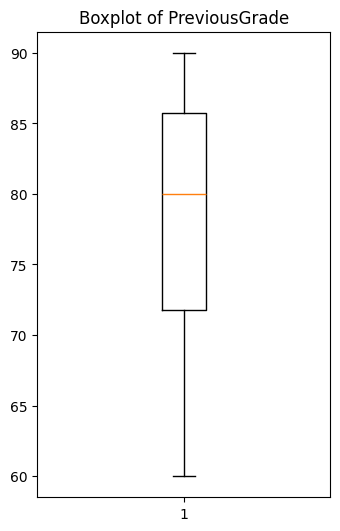

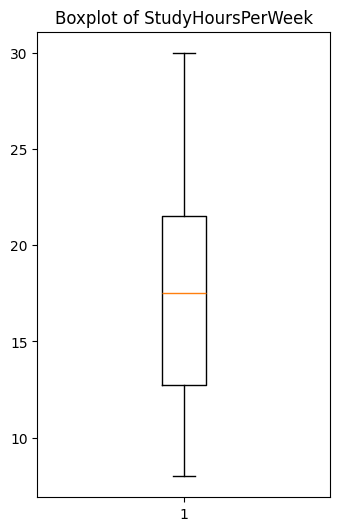

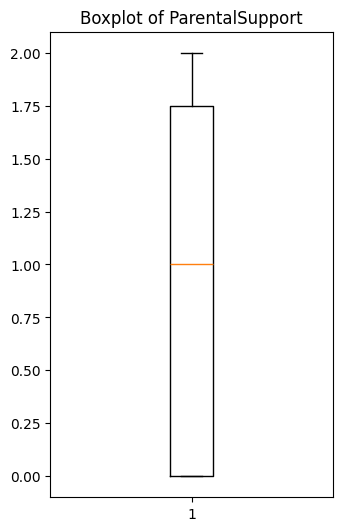

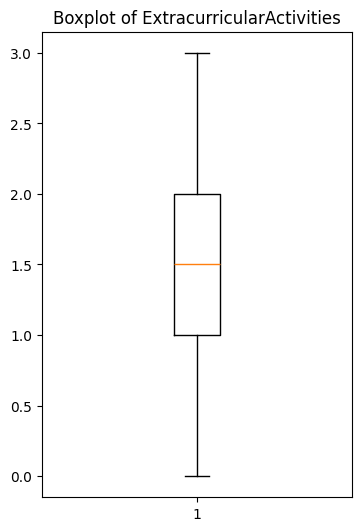

In [99]:
numerical_data = drop_data[["Name", "Gender", "AttendanceRate", "PreviousGrade", "StudyHoursPerWeek", "ParentalSupport", "ExtracurricularActivities"]]
for i, x in enumerate(numerical_data):
    plt.figure(figsize=(20,10))
    plt.subplot(2,6, i+1)
    plt.boxplot(x=x, data = drop_data)
    plt.tight_layout()
    plt.title(f"Boxplot of {x}")
    plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = df_model.drop(columns=['FinalGrade'])
y = df_model['FinalGrade'].to_numpy().reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
models = ['Linear Regression','Decision Tree','Random Forest']
for i, x in enumerate(model):
    train = x.fit(X_train,y_train)
    train_test = x.predict(X_test)
    print("Model for", models[i])
    print("MAE: ",np.round(mean_absolute_error(y_test, train_test),5),"%")
    print("MAE: ",np.round(mean_squared_error(y_test, train_test),5),"%")
    print("MAE: ",np.round(np.sqrt(mean_absolute_error(y_test, train_test)),5),"%")
    print("MAE: ",np.round(r2_score(y_test, train_test),5),"%")

Model for Linear Regression
MAE:  0.03519 %
MAE:  0.0024 %
MAE:  0.18758 %
MAE:  0.96166 %
Model for Decision Tree
MAE:  0.1 %
MAE:  0.01111 %
MAE:  0.31623 %
MAE:  0.82222 %


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for Random Forest
MAE:  0.0265 %
MAE:  0.00092 %
MAE:  0.16279 %
MAE:  0.98524 %


In [109]:
X_test
# # models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor()
# }

array([[0.88888889, 0.        , 0.48      , 0.18181818, 0.33333333,
        0.66666667, 1.        ],
       [0.11111111, 1.        , 0.8       , 0.54545455, 0.83333333,
        0.66666667, 0.5       ]])

In [107]:
# from sklearn.model_selection import train_test_split, cross_val_score
# for model_name, model in models.items():
#     scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
#     # Convert negative MAE to positive for better interpretation
#     mean_mae = -scores.mean()
#     print(f"{model_name} Mean MAE: {mean_mae:.5f}")

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=8.